In [4]:
#Import Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")

In [5]:
#Load All Data

sales = pd.read_csv("data/Online_Sales.csv")
customers = pd.read_excel("data/CustomersData.xlsx")
coupons = pd.read_csv("data/Discount_Coupon.csv")
marketing = pd.read_csv("data/Marketing_Spend.csv")
tax = pd.read_excel("data/Tax_amount.xlsx")

In [6]:

#Initial Exploration
sales.info()
sales.head()

customers.info()
coupons.info()
marketing.info()
tax.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   i

In [7]:
# Missing values
sales.isnull().sum()

# Duplicates
sales.duplicated().sum()


np.int64(0)

In [8]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


C:\Users\Harsha vardhan\AppData\Local\Temp\ipykernel_44548\2984567136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acquisition_Month', y='New_Customers_counts', data=Count_acquistion, palette='Blues_d')


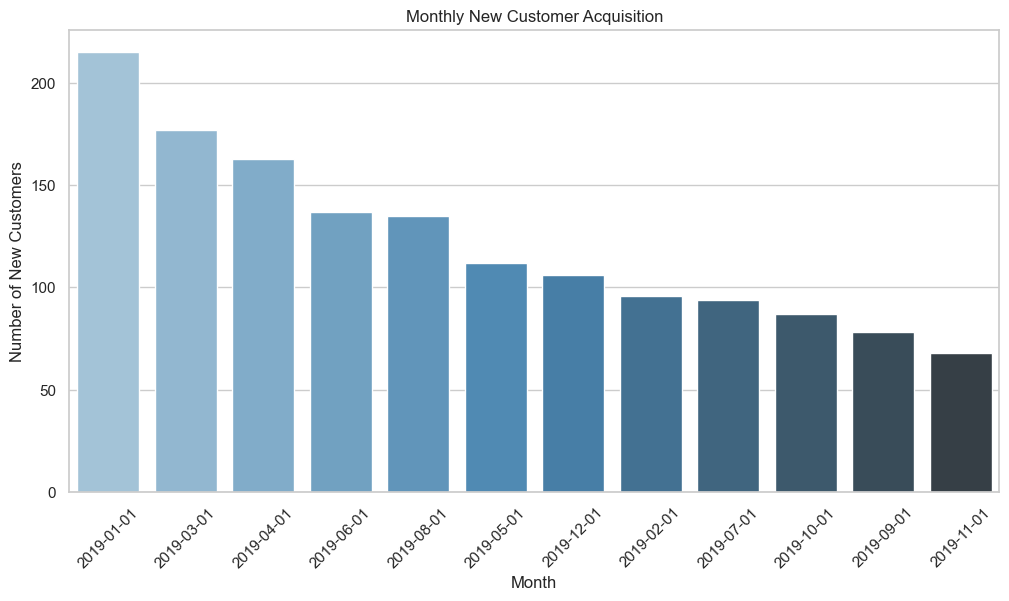

In [9]:
#Business Question 1 :

# Step 1: Prepare the Data for Acquisition Analysis

sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'])
first_purchase = sales.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase['Acquisition_Month'] = first_purchase['Transaction_Date'].dt.to_period('M')
first_purchase.head()
Count_acquistion = first_purchase['Acquisition_Month'].value_counts().reset_index()
Count_acquistion.columns = ['Acquisition_Month','New_Customers_counts']
#Count_acquistion = Count_acquistion.sort_values(by='Acquisition_Month')
Count_acquistion['Acquisition_Month'] = Count_acquistion['Acquisition_Month'].dt.to_timestamp()
Count_acquistion

#Step 2: Visualize the Acquisition Trend

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Acquisition_Month', y='New_Customers_counts', data=Count_acquistion, palette='Blues_d')
plt.title('Monthly New Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

In [12]:
#Business Question 2 :

